# 종합실습2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten #
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist #

* 함수 만들기

In [3]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [4]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

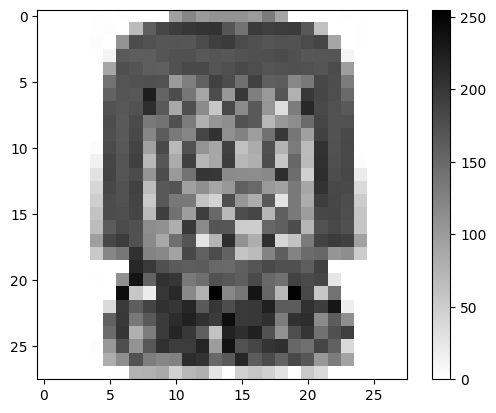

In [7]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 204

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [8]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf) # 행 단위로 쭉 펴줘라
x_train[n]

array([[  0,   0,   0,   0,   1,   0,   1,   0,   0,   0,  95, 121, 101, 107, 107, 107, 100, 132,  90,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   2,   0,  68, 160, 185, 195, 200, 203, 204, 170, 140, 196, 192, 195, 196, 167,  63,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0, 107, 179, 173, 169, 170, 169, 180, 192, 196, 180, 175, 170, 173, 172, 180, 186,  90,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,  11, 166, 162, 162, 170, 174, 175, 167, 170, 168, 172, 175, 176, 180, 175, 168, 169, 170,  11,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  89, 176, 171, 162, 160, 173, 182, 181, 171, 175, 181, 177, 171, 173, 175, 174, 170, 180,  97,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 140, 171, 174, 175, 173, 100, 128, 159, 189, 179, 144, 190, 160, 163, 120, 134, 184, 178, 132,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 156, 170, 168, 226, 155, 179, 137,  90, 179, 103, 198, 128, 102, 170,  78, 199, 185, 177, 149,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 172, 168, 172, 210, 165,  87, 176, 116,  56, 183, 117, 165, 105,  33, 131, 215, 183, 174, 166,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 178, 165, 180, 133, 140, 175, 131,  79, 106, 113, 174, 166,  72, 103, 114, 148, 186, 173, 174,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 176, 166, 182, 121, 163, 134, 121, 185, 204, 111, 125,  97, 142, 200, 137,  95, 190, 172, 182,   0,   0,   0,   0],
       [  0,   0,   0,   0,   3, 180, 168, 187,  94, 182,  70, 174, 107,  89, 190,  63,  83, 175,  76, 132,  68, 204, 173, 183,   0,   0,   0,   0],
       [  0,   0,   0,   0,  14, 186, 171, 191,  71, 169,  84, 191,  73,  88, 194,  71,  80, 178,  56, 152,  69, 205, 175, 183,   2,   0,   0,   0],
       [  0,   0,   0,   0,  29, 187, 171, 179, 106, 179, 102, 140, 202, 200, 116, 115, 114, 118, 209, 146,  47, 210, 178, 184,  19,   0,   0,   0],
       [  0,   0,   0,   0,  41, 184, 174, 189,  67, 167, 171,  95, 112,  90, 103, 159, 150, 102,  94, 133,  89, 204, 183, 181,  37,   0,   0,   0],
       [  0,   0,   0,   0,  49, 179, 174, 187,  53, 167, 133, 134,  60,  43, 177, 104,  82, 165,  27, 134,  83, 193, 184, 178,  51,   0,   0,   0],
       [  0,   0,   0,   0,  60, 179, 177, 186,  69, 193, 142,  97, 193, 149,  70, 178, 186,  73, 160, 133,  98, 184, 185, 177,  57,   0,   0,   0],
       [  0,   0,   0,   0,  67, 164, 180, 173, 114, 110,  81, 199, 116, 170, 169,  51,  50, 153, 160, 179,  73, 174, 183, 175,  57,   0,   0,   0],
       [  0,   0,   0,   0,  96, 184, 195, 173, 117,  87, 144, 171,  27,  74, 210, 109,  81, 209,  41,  61, 132, 188, 196, 189,  94,   0,   0,   0],
       [  0,   0,   0,   0,  55, 121, 136, 206, 124, 120,  92, 184, 159, 180, 156,  59,  69, 123, 161, 124, 148, 152, 106, 113,  50,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 216, 197, 175, 164, 162, 164, 151, 150, 160, 170, 181, 175, 175, 161, 189,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0, 111, 235, 156, 205, 201, 134, 145, 174, 168, 161, 182, 151, 141, 188, 180, 185,  25,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 242,  56,  19, 201, 213, 118,  78, 255, 119, 137, 235, 153,  72, 252, 183,  56, 140,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  37, 197, 161, 187, 207, 201, 217, 166, 201, 178, 197, 199, 223, 163, 163, 205, 194, 233,  17,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 158, 199, 135, 165, 196, 211, 221, 207, 196, 242, 197, 199, 208, 130, 205, 210, 116, 162, 112,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 148, 202,  79, 130, 196, 218, 199, 160,  61, 220, 209, 223, 172, 109, 177, 202, 142, 175, 192,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2, 103, 177, 107, 168, 206, 194, 195, 219,  98, 236, 173, 186, 203, 208, 152, 144, 186, 157,  38,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  81, 113, 172, 130, 121, 125, 211, 204, 151, 166, 217, 163, 180, 156, 182, 168, 103, 131,  91

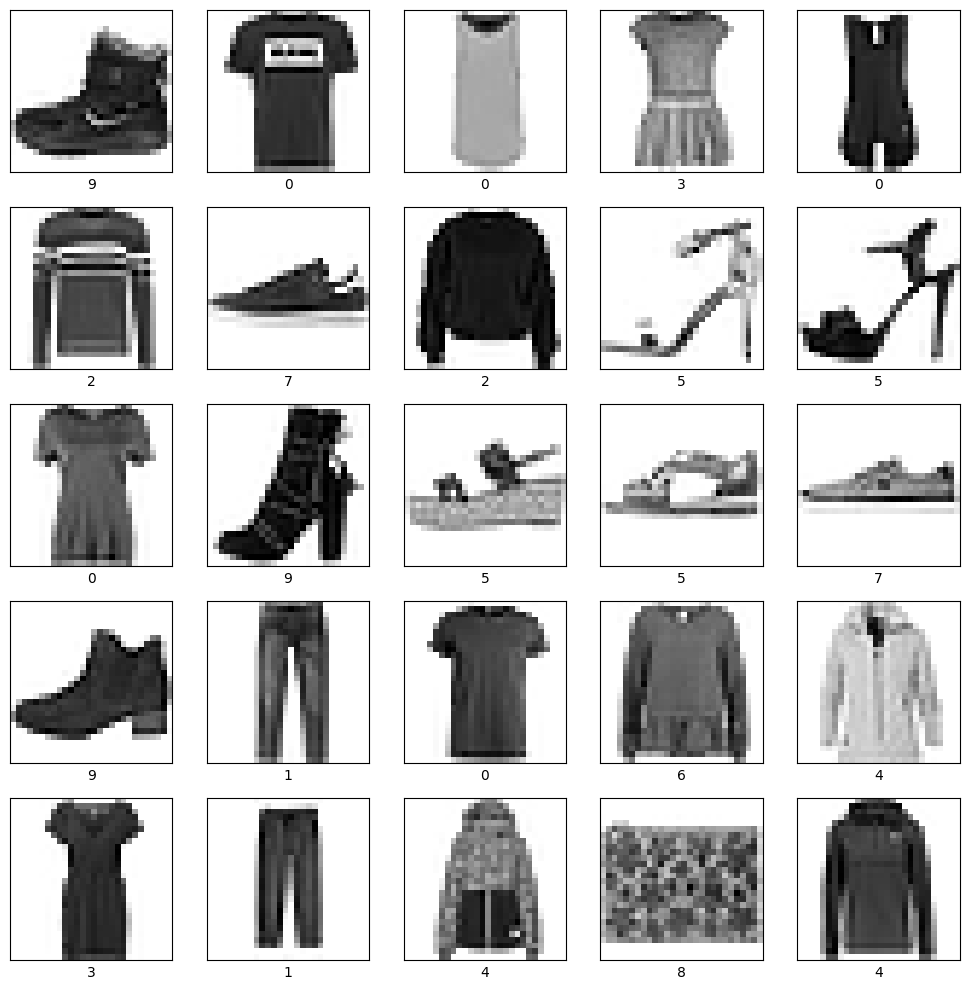

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [1]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

NameError: name 'x_train' is not defined

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
a, a.shape

In [ ]:
#
print(a.reshape(3,2))
print(a.reshape(6,1))
print(a.reshape(6, -1))

In [ ]:
x_train = x_train.reshape(60000, -1) # 60000x28x28 에서 60000x764 로 바꾸기 -> 각 이미지를 한 줄로
x_val = x_val.reshape(10000, -1)

In [ ]:
x_train.shape, x_val.shape

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_test를 그냥 255로 나누면 됨

In [ ]:
x_train = x_train / 255.
x_test = x_val / 255.

## 4.모델링

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

In [ ]:
clear_session()

model = Sequential(Dense(10, input_shape = (nfeatures,), activation = 'softmax')) # input node 764 -> node 10

model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' ) # 정수 인코딩

history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

* 학습결과 그래프

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

In [ ]:
pred[:5]

In [ ]:
pred_1[:5]

In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정하세요)
    * learning_rate

### (1) 모델1

In [ ]:
clear_session()
model = Sequential( [Dense(30, input_shape=(x_train.shape[1],), activation='relu'), # input 764 -> 30 -> 10(output)
                     Dense(10, activation='softmax')]) # output은 integer encoding 되어 있음
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_split=.2).history
dl_history_plot(history)

In [ ]:
y_pred = model.predict(x_val) # 확률 값
y_pred_1 = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val, y_pred_1))
print(classification_report(y_val, y_pred_1))

### (2) 모델2

In [ ]:
clear_session()
model = Sequential( [Dense(50, input_shape=(x_train.shape[1],), activation='relu'), # input 764 -> 30 -> 10(output)
                     Dense(30, activation='relu'),
                     Dense(10, activation='softmax')]) # output은 integer encoding 되어 있음
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs=20, validation_split=.2).history
dl_history_plot(history)

In [ ]:
y_pred = model.predict(x_val) # 확률 값
y_pred_1 = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val, y_pred_1))
print(classification_report(y_val, y_pred_1))